In [24]:
%matplotlib inline
#pip install Theano

import theano
from theano import tensor as T

#initialize
x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = w1 * x1 + w0

#compile
net_input = theano.function(inputs=[w1,x1,w0],outputs=z1)

#execute
print('Net input: %.2f' %net_input(2.0,1.0,0.5))

Net input: 2.50


In [25]:
print(theano.config.floatX)

float32


In [26]:
theano.config.floatX = 'float32'

In [27]:
print(theano.config.floatX)

float32


In [28]:
#Otras opciones:
# export THEANO_FLAGS=floatX=float32    (en bash)
#THEANO_FLAGS=floatX=float32 python the_script.py    (al ejecutar el script)

In [29]:
print(theano.config.device)

cpu


In [30]:
#Por ejemplo, se puede:
#THEANO_FLAGS=device=gpu,floatX=float32 python the_script.py
#echo -e "\n[global]\nfloatX=float32\ndevice=gpu\n" >> ~/.theanorc  (para hacerlo permanente)

In [31]:
import numpy as np

#initialize
#Para 64 bit, habría que usar "dmatrix" en vez de "fmatrix"
x = T.fmatrix(name='x')
x_sum = T.sum(x,axis=0)

#compile
calc_sum = theano.function(inputs=[x],outputs=x_sum)

#execute (Python list)
ary = [[1,2,3],[1,2,3]]
print('Column sum:',calc_sum(ary))

Column sum: [ 2.  4.  6.]


In [32]:
#execute (numpy array)
ary = np.array([[1,2,3],[1,2,3]], dtype=theano.config.floatX)
print('Column sum:',calc_sum(ary))

Column sum: [ 2.  4.  6.]


In [33]:
print(x) #Muestra el nombre, si se le dio alguno. Si no, muestra el tipo de tensor

x


In [34]:
print(x.type())

<TensorType(float32, matrix)>


In [35]:
#initialize
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]],dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w,w+1.0]]

#compile
net_input = theano.function(inputs=[x],updates=update,outputs=z)

#execute
data = np.array([[1,2,3]],dtype=theano.config.floatX)
for i in range(5):
    print('z%d: '% i,net_input(data))


z0:  [[ 0.]]
z1:  [[ 6.]]
z2:  [[ 12.]]
z3:  [[ 18.]]
z4:  [[ 24.]]


In [36]:
#initialize
data = np.array([[1,2,3]],dtype=theano.config.floatX)
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0,0.0,0.0]],dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w,w+1.0]]

#compile
net_input = theano.function(inputs=[], updates=update, givens={x:data}, outputs=z)

#execute
for i in range(5):
    print('z: ',net_input())

z:  [[ 0.]]
z:  [[ 6.]]
z:  [[ 12.]]
z:  [[ 18.]]
z:  [[ 24.]]


In [37]:
#Linear Regression Example

X_train = np.asarray([[0.0],[1.0],[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],
                     [8.0],[9.0]],dtype=theano.config.floatX)
y_train = np.asarray([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0],dtype=theano.config.floatX)


In [38]:
import theano
from theano import tensor as T
import numpy as np

def train_linreg(X_train,y_train,eta,epochs):
    costs = []
    #initialize arrays
    eta0 = T.scalar('eta0')
    y = T.fvector('y')
    X = T.fmatrix('X')
    w = theano.shared(np.zeros(shape=(X_train.shape[1]+1),dtype=theano.config.floatX),name='w')
    
    #calculate cost
    net_input = T.dot(X,w[1:]) + w[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors,2))
    
    #perform gradient update
    gradient = T.grad(cost,wrt=w)
    update = [(w, w - eta0 * gradient)]
    
    #compile model
    train = theano.function(inputs=[eta0],outputs=cost,updates=update,givens={X: X_train, y:y_train})
    
    for _ in range(epochs):
        costs.append(train(eta))
    
    return costs,w


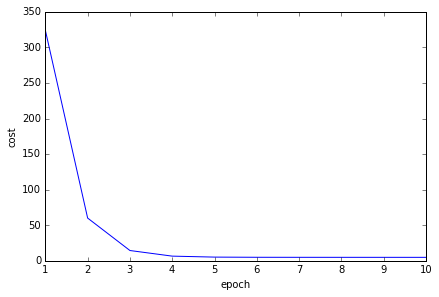

In [39]:
import matplotlib.pyplot as plt
costs,w = train_linreg(X_train, y_train, eta=0.001, epochs=10)
plt.plot(range(1,len(costs)+1),costs)
plt.tight_layout()
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [40]:
def predict_linreg(X,w):
    Xt = T.matrix(name='X')
    net_input = T.dot(Xt,w[1:]) + w[0]
    predict = theano.function(inputs=[Xt],givens={w: w},outputs=net_input)
    
    return predict(X)

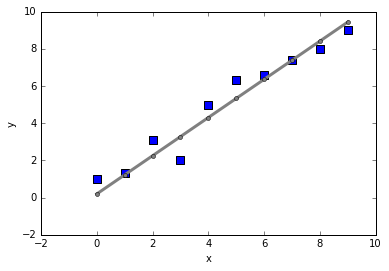

In [41]:
plt.scatter(X_train,y_train,marker='s',s=50)
#print('Xtrain.shape: ',X_train.shape,'\n Predict_linreg: ',predict_linreg(X_train,w))
plt.plot(range(X_train.shape[0]),predict_linreg(X_train,w),
        color='gray',
        marker='o',
        markersize=4,
        linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
X = np.array([[1.0, 1.4, 1.5]])
w = np.array([0.0,0.2,0.4])

def net_input(X,w):
    z = X.dot(w)
    return z

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X,w):
    z = net_input(X,w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X,w)[0])

P(y=1|x) = 0.707


In [43]:
#Con múltiples clases
W = np.array([[1.1,1.2,1.3,0.5],
             [0.1,0.2,0.4,0.1],
            [0.2,0.5,2.1,1.9]])
A = np.array([[1.0],
             [0.1],
             [0.3],
             [0.7]])
Z = W.dot(A)
y_probas = logistic(Z)

print('Probabilities:\n',y_probas)

Probabilities:
 [[ 0.87653295]
 [ 0.57688526]
 [ 0.90114393]]


In [44]:
#Se ve que las "probabilidades" no suman 1, con la función logística
y_class = np.argmax(Z,axis=0)
print('predicted class label: %d'%y_class[0])

predicted class label: 2


In [45]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def softmax_activation(X,w):
    z = net_input(X,w)
    return softmax(z)

y_probas = softmax(Z)
print('Probabilities:\n',y_probas)

Probabilities:
 [[ 0.40386493]
 [ 0.07756222]
 [ 0.51857284]]


In [46]:
y_probas.sum()

1.0

In [47]:
y_class = np.argmax(Z,axis=0)
print('predicted class label: %d'%y_class[0])

predicted class label: 2


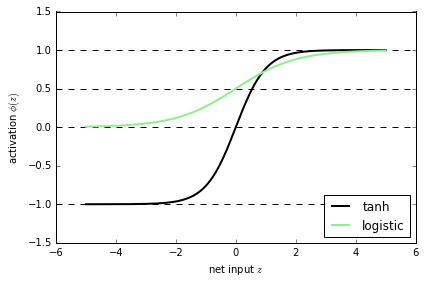

In [48]:
def tanh(z):
    e_p = np.exp(z) 
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)  

import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

# alternatives:
# from scipy.special import expit
# log_act = expit(z)
# tanh_act = np.tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(-1, color='black', linestyle='--')

plt.plot(z, tanh_act, 
         linewidth=2, 
         color='black', 
         label='tanh')
plt.plot(z, log_act, 
         linewidth=2, 
         color='lightgreen', 
         label='logistic')

plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

In [49]:
# Keras:  >pip install Keras
#http://yann.lecun.com/exdb/mnist

import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte'%kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'%kind)
    with open(labels_path, 'rb') as lbpath:
        magic,n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    with open(images_path,'rb') as imgpath:
        masgic,num,rows,cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784)

    return images, labels

In [50]:
X_train,y_train = load_mnist('/Users/antelInvestigacion/IA/mnist',kind='train')
print('Rows: %d, columns: %d'%(X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [51]:
X_test,y_test = load_mnist('/Users/antelInvestigacion/IA/mnist',kind='t10k')
print('Rows: %d, columns: %d'%(X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


In [52]:
import theano
theano.config.floatX = 'float32'
X_train = X_train.astype(theano.config.floatX)
y_train = y_train.astype(theano.config.floatX)

In [53]:
from keras.utils import np_utils
print('First 3 labels: ',y_train[:3])

First 3 labels:  [ 5.  0.  4.]


In [55]:
y_train_ohe = np_utils.to_categorical(y_train)
print('First 3 labels (one-hot): ',y_train_ohe[:3])

First 3 labels (one-hot):  [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [56]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(1)

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1],
               output_dim=50,
               init='uniform',
               activation='tanh'))

model.add(Dense(input_dim=50,
               output_dim=50,
               init='uniform',
               activation='tanh'))

model.add(Dense(input_dim=50,
               output_dim=y_train_ohe.shape[1],
               init='uniform',
               activation='softmax'))

sgd = SGD(lr=0.001,decay=1e-7,momentum=.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=["accuracy"])

In [62]:
model.fit(X_train,
         y_train_ohe,
         nb_epoch=50,
         batch_size=300,
         verbose=1,
         validation_split=0.1)
         #,show_accuracy=True) Deprecated

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 0s - loss: 0.1213 - val_loss: 0.1400
Epoch 2/50
54000/54000 [==============================] - 0s - loss: 0.1249 - val_loss: 0.1388
Epoch 3/50
54000/54000 [==============================] - 0s - loss: 0.1231 - val_loss: 0.1402
Epoch 4/50
54000/54000 [==============================] - 0s - loss: 0.1261 - val_loss: 0.1344
Epoch 5/50
54000/54000 [==============================] - 0s - loss: 0.1257 - val_loss: 0.1402
Epoch 6/50
54000/54000 [==============================] - 0s - loss: 0.1213 - val_loss: 0.1296
Epoch 7/50
54000/54000 [==============================] - 0s - loss: 0.1221 - val_loss: 0.1270
Epoch 8/50
54000/54000 [==============================] - 0s - loss: 0.1214 - val_loss: 0.1402
Epoch 9/50
54000/54000 [==============================] - 0s - loss: 0.1218 - val_loss: 0.1424
Epoch 10/50
54000/54000 [==============================] - 0s - loss: 0.1232 - val_loss: 0.1328


In [63]:
y_train_pred = model.predict_classes(X_train,verbose=0)
print('First 3 predictions: ',y_train_pred[:3])

First 3 predictions:  [5 0 4]


In [64]:
train_acc = np.sum(y_train==y_train_pred,axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%'% (train_acc*100))

Training accuracy: 96.59%


In [65]:
y_test_pred = model.predict_classes(X_test,verbose=0)
test_acc = np.sum(y_test==y_test_pred,axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%'% (test_acc*100))

Test accuracy: 95.47%
